**DATA ANALYSIS PYTHON PROJECT - BLINKIT ANALYSIS**

**Import Raw Data**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r"C:\Users\geeta goel\Downloads\blinkit_data.csv")

In [6]:
df.head(5)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


**SIZE OF DATA**

In [8]:
print("Size of data:",df.shape)

Size of data: (8523, 12)


**FIELD INFO**

In [11]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [13]:
df.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

In [15]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [17]:
df['Item Fat Content'] = df['Item Fat Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'})

In [19]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat']


**BUSINESS REQUIREMENT**

**KPI's REQUIREMENT**

In [28]:
#total Sales
total_sales = df['Sales'].sum()

#Average Sales
avg_sales = df['Sales'].mean()

#No of item sold 
no_of_items_sold = df['Sales'].count()

#Average Ratings
avg_ratings = df['Rating'].mean()

#Display

print(f"total sales : ${total_sales:,.0f}")                      
print(f"total sales : ${avg_sales:,.1f}")
print(f"No Of Items Sold : ${no_of_items_sold:,.0f}")
print(f"Average Ratings : ${avg_ratings:,.1f}")

total sales : $1,201,681
total sales : $141.0
No Of Items Sold : $8,523
Average Ratings : $4.0


**CHARTS REQUIREMENT**

**Total Sales BY Fat Content**

<function matplotlib.pyplot.show(close=None, block=None)>

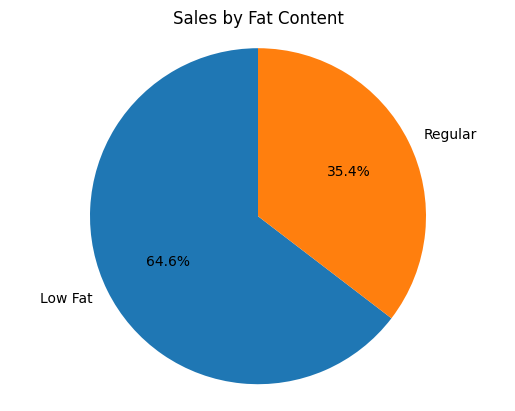

In [37]:
sales_by_fat = df.groupby('Item Fat Content')['Sales'].sum()
   
plt.pie(sales_by_fat, labels = sales_by_fat.index,
autopct = '%.1f%%',
startangle = 90)
plt.title('Sales by Fat Content')
plt.axis('equal')        
plt.show

**Total Sales BY Item Type**

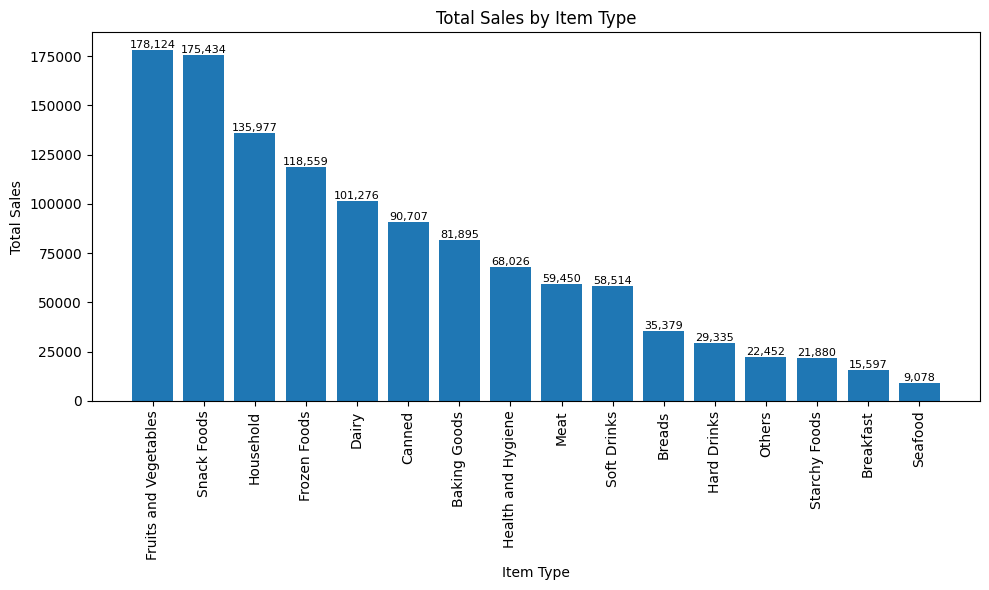

In [40]:
# Group and sort data
sales_by_type = df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)

# Set figure size
plt.figure(figsize=(10, 6))

# Plot bar chart
bars = plt.bar(sales_by_type.index, sales_by_type.values)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Set axis labels and title
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Item Type')

# Add data labels on top of bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height(),
             f'{bar.get_height():,.0f}',
             ha='center', va='bottom', fontsize=8)

# Adjust layout and display plot
plt.tight_layout()
plt.show()

**Fat Content By Outlet For Total Sales**

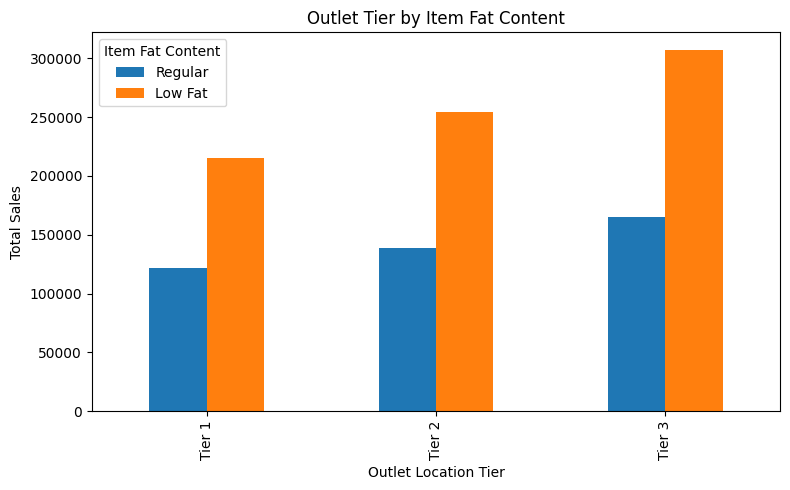

In [43]:
grouped = df.groupby(['Outlet Location Type', 'Item Fat Content'])['Sales'].sum().unstack()
grouped = grouped[['Regular', 'Low Fat']]
ax = grouped.plot(kind='bar', figsize=(8, 5), title='Outlet Tier by Item Fat Content')
plt.xlabel('Outlet Location Tier')
plt.ylabel('Total Sales')
plt.legend(title='Item Fat Content')
plt.tight_layout()
plt.show()


**Total Sales By  Outlet Establishment**

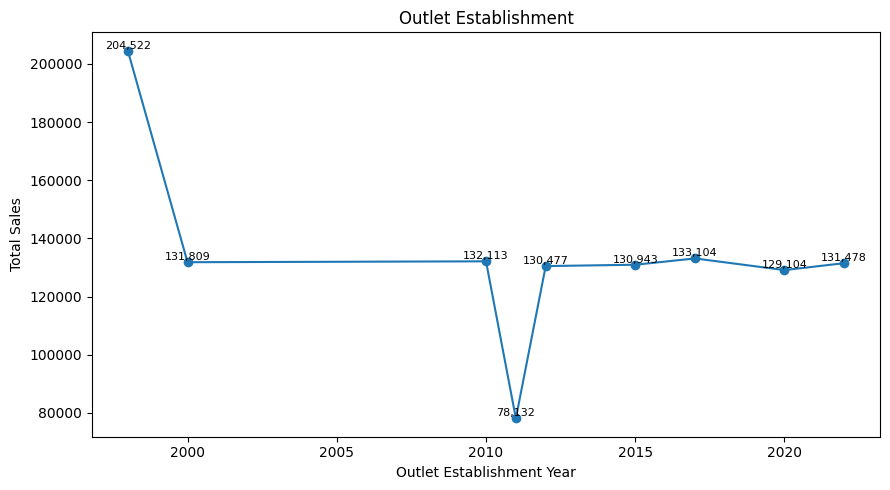

In [48]:
sales_by_year = df.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()

plt.figure(figsize=(9, 5))
plt.plot(sales_by_year.index, sales_by_year.values, marker='o', linestyle='-')

plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.title('Outlet Establishment')

for x, y in zip(sales_by_year.index, sales_by_year.values):
    plt.text(x, y, f'{y:,.0f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

**Sales By  Outlet Size**

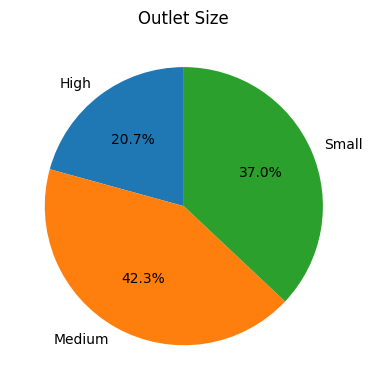

In [53]:
sales_by_size = df.groupby('Outlet Size')['Sales'].sum()

plt.figure(figsize=(4,4))
plt.pie(sales_by_size, labels=sales_by_size.index, autopct='%1.1f%%' , startangle=90)
plt.title('Outlet Size')
plt.tight_layout()
plt.show()

**Sales BY Outlet Location**

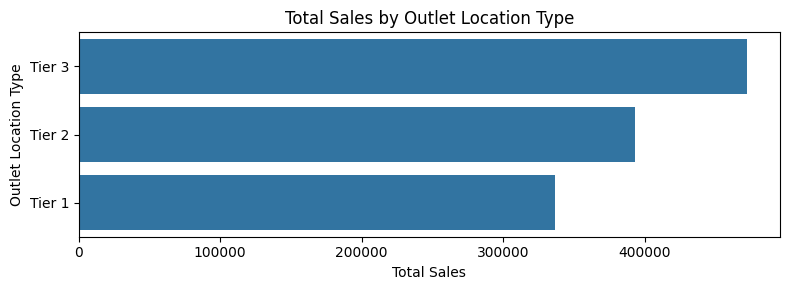

In [56]:
sales_by_location = df.groupby('Outlet Location Type')['Sales'].sum().reset_index()
sales_by_location = sales_by_location.sort_values('Sales', ascending=False)

plt.figure(figsize=(8, 3))
ax = sns.barplot(x='Sales', y='Outlet Location Type', data=sales_by_location)

plt.title('Total Sales by Outlet Location Type')
plt.xlabel('Total Sales')
plt.ylabel('Outlet Location Type')

plt.tight_layout()
plt.show()
